<a href="https://colab.research.google.com/github/HJ-Kurt-Su/model/blob/main/classification_model_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare: Install Package

In [ ]:
#@markdown ####**Required Package & Function:**
import datetime
from google.colab import files
import os
from ipywidgets import widgets
import pandas as pd
import numpy as np




## File Operateion
def import_file():  
  # Target: import file GUI
  uploaded = files.upload()
# print(uploaded)
  print("File Upload Done")
  print(datetime.datetime.now())
  return uploaded


def list_file():
  # Target: list file in current colab folder
  # Create dropdown widgets 
  lsdi = os.listdir('/content')

  lsdi.remove('.config')
  lsdi.remove('sample_data')
  # print(lsdi)
  upload_files = lsdi
  # print(upload_files)

  # dropdown_x_var = widgets.Dropdown(options =dropdown_list)
  dropdown_files = widgets.Dropdown(options =upload_files)

  return dropdown_files


def operate_file(del_file, file_operation):
  # Target: Delete or import file.
  # Input: list
  # Delete file by os.remove
  # Import file by pandas
  if file_operation == "Delete File":
    try:
      # del_file = dropdown_files
      os.remove(del_file)
      print("Delete File Done: ", del_file)
    except FileNotFoundError:
      print("No this file in Colab, Please upload!")

  else:

    try:
      df_raw = pd.read_csv(data_name, encoding=encoding)

    
      print("Dataframe Size: ", df_raw.shape)
      display(df_raw.head())

    except FileNotFoundError:
      print("No this file in Colab, Please upload!")
    return df_raw, cell_rename, exit_test_set


def save_csv_file(df, save_file, download_filter_data=True):
  # Target: save csv file & decide download or not
  # Input: dataframe, file name, download or not

  df.to_csv(save_file, encoding=encoding, index=True)

  if download_filter_data == True:
    files.download(save_file)




## DataFrame Operateion
def revalue_data_cell_multi(df, change_col_name, change_item):
  # Target: change dataframe cell value with multiple column
  # Input: Dataframe, list, dict
  # Use dict type input & by for loop.
  location = 0
  for i in change_col_name:
    # print(i)
    
    change_dict = change_item[location]
    # print(change_dict)

    df[i] = df[i].map(change_dict)
    print(i, ": ", df[i].unique())
    location+=1
  return df

def revalue_data_cell_single(df, modify_col, change_item):
  # Target: change dataframe cell value with multiple column
  # Input: Dataframe, column name, dict
  # Use dict type input & by for loop.
  df[modify_col] = df[modify_col].map(change_item)
  print(modify_col, ": ", df[modify_col].unique())
  return df


def revalue_binary_data_cell_multi(df, change_col_name, change_item):
  # Target: change dataframe cell value to 0 & 1 by operator & criteria judge 
  # Input: Dataframe, list, dict
  # Use dict type input & by for loop.
  location = 0
  for i in change_col_name:
    # print(i)
    
    change_dict = change_item[location]
    operator = list(change_dict.keys())[0]
    criteria = list(change_dict.values())[0]
    # print(change_dict)
    if operator == ">":
      df[i] = (df[i] > criteria).astype(int)
    elif operator == "<":
      df[i] = (df[i] < criteria).astype(int)
    elif operator == "<=":
      df[i] = (df[i] <= criteria).astype(int)
    elif operator == ">=":
      df[i] = (df[i] >= criteria).astype(int)
    elif operator == "==":
      df[i] = (df[i] == criteria).astype(int)
    elif operator == "!=":
      df[i] = (df[i] != criteria).astype(int)

    location+=1
    return df


def revalue_binary_data_cell_single(df, modify_col, operator, criteria):
  # Target: change dataframe cell value to 0 & 1 by operator & criteria judge 
  # Input: Dataframe, string, criteria(number)
  # Use dict type input & by for loop.
  if operator == ">":
    df[modify_col] = (df[modify_col] > criteria).astype(int)
  elif operator == "<":
    df[modify_col] = (df[modify_col] < criteria).astype(int)
  elif operator == "<=":
    df[modify_col] = (df[modify_col] <= criteria).astype(int)
  elif operator == ">=":
    df[modify_col] = (df[modify_col] >= criteria).astype(int)
  elif operator == "==":
    df[modify_col] = (df[modify_col] == criteria).astype(int)
  elif operator == "!=":
    df[modify_col] = (df[modify_col] != criteria).astype(int)

  return df




## Model Score (Regression Type)
from sklearn.metrics import r2_score, mean_absolute_percentage_error, max_error, mean_squared_error

def model_score(y, prediction, p):
  # Target: calculate model metrics (r2, mape, rmse)
  # Input: actual Y, predict Y, factor number
  # Use sklearn metrice module to calculate metrics

  model_r2_score = r2_score(y, prediction)
  n = len(y)

  adj_r_squared = 1 - (1 - model_r2_score) * (n-1)/(n-p-1)

  

  model_mape_score = mean_absolute_percentage_error(y, prediction)

  epsilon = np.finfo(np.float64).eps
  mape = np.abs(prediction - y) / np.maximum(np.abs(y), epsilon)
  mape_series = pd.Series(mape)

  model_rmse_score = mean_squared_error(y, prediction, squared=False)

  return model_r2_score, adj_r_squared, model_rmse_score, model_mape_score, mape_series


import plotly.express as px
from plotly.subplots import make_subplots

import plotly.graph_objects as go


def reg_model_fig(x_varible,y_varible, fig_size):
  # Target: plot model performance figure by residual
  # Input: actual Y, residual, figure size with list type
  # 

  fig = make_subplots(
      rows=2, cols=2,
      subplot_titles=("yhat-residual-plot (random better)", "residual-histogram-plot (normal distribution better)", 
                      "redidual-sequence-plot (random better)", "qq-plot (along line better)"))

  fig.add_trace(go.Scatter(x=x_varible, y=y_varible, mode="markers"),
                row=1, col=1)

  fig.add_trace(go.Histogram(x=y_varible,),
                row=1, col=2)

  fig.add_trace(go.Scatter(y=y_varible, mode="lines+markers"),
                row=2, col=1)

  # fig.add_trace(go.Scatter(x=df_qq["x_point"], y=df_qq["y_point"], mode="markers"),
  #               row=2, col=2)

  # fig.add_trace(go.Scatter(x=df_qq["x_line"], y=df_qq["y_line"], mode="lines"),
  #               row=2, col=2)

  fig.update_xaxes(title_text="Y-hat", row=1, col=1)
  fig.update_yaxes(title_text="Residual", row=1, col=1)

  fig.update_xaxes(title_text="Residual", row=1, col=2)
  fig.update_yaxes(title_text="Count", row=1, col=2)

  fig.update_xaxes(title_text="Sequence", row=2, col=1)
  fig.update_yaxes(title_text="Residual", row=2, col=1)

  # fig.update_xaxes(title_text="Theoretical Quantiles", row=2, col=2)
  # fig.update_yaxes(title_text="Sample Quantiles", row=2, col=2)

  fig.update_layout(height=fig_size[1], width=fig_size[0],
                    title_text="Model Check Figure",
                    showlegend=False)
  
  return fig

print("Import Module Done")
print(datetime.datetime.now())

Import Module Done
2023-03-17 02:04:24.444001


##############################################

## Start: File Operation

In [ ]:
#@markdown **Import File Operation**
aa = import_file()


Saving Type1-Retention_test (classfication).csv to Type1-Retention_test (classfication).csv
File Upload Done
2023-03-17 02:07:37.981231


### List File & Operation

In [ ]:
#@markdown **Select File For Next Operation**
print("Select File For Next Operation")
file_list = list_file()
# print(file_list)
display(file_list)
print("--------------------")

Select File For Next Operation


Dropdown(options=('Type1-Retention_test (classfication).csv', 'type1_re_mod.csv', 'type1_re_mod3.csv'), value=…

--------------------


In [ ]:
#@markdown ####**File Operation:**

file_operation = "Import File" #@param ["Import File", "Delete File"]
encoding = "utf-8" 

data_name = file_list.value
# breakpoint()
if file_operation == "Import File":
  cell_rename = False
  exit_test_set = False
  df_raw, cell_rename, exit_test_set = operate_file(data_name, file_operation)
  print(df_raw.columns)
else:
  operate_file(data_name, file_operation)

print(datetime.datetime.now())


Dataframe Size:  (17, 10)


,Weight (g),spring (k),L4,L5,L7,L8,L9,L10,Simulation Response (Life time (second)),result (900)
0,538.00,12.411429,2.532343,6.685695,8.069344,4.463041,13.913041,0.346356,1.000000e+20,pass
1,542.00,48.228211,3.534274,6.303013,17.881629,12.768961,22.218961,0.199765,7.807358e+07,pass
2,542.40,48.228211,3.534275,6.303013,17.881629,12.768961,22.218961,0.199765,1.000000e+20,pass
3,558.72,55.696391,3.988043,6.165989,10.902100,3.929088,13.379088,0.317339,1.250039e+03,pass
4,566.00,36.797323,3.078115,4.908320,16.533370,4.858561,14.308561,0.276301,9.823663e+05,pass


Index(['Weight (g)', 'spring (k)', 'L4', 'L5', 'L7', 'L8', 'L9', 'L10',
       'Simulation Response (Life time (second))', 'result (900)'],
      dtype='object')
2023-03-17 02:07:53.371400


##############################################

## Data Operation (Optional)

### Reset Status

In [ ]:
#@markdown ##**Reset (Optional)**
#@markdown ####**Reset Parameter:** Run While Required
cell_rename = False
exit_test_set = False
tune_model = False
print(datetime.datetime.now())
print("Reset Done!")

2023-03-10 01:58:43.371911
Reset Done!


### Data Prepare: Single Columns (Optional)

In [ ]:
#@markdown ####Choose Modify Column
if cell_rename == False:
  df = df_raw.copy()


dpdn_column_list = list(df.columns)
# dropdown_list.append("None")

# dropdown_x_var = widgets.Dropdown(options =dropdown_list)
dpdn_mod_column = widgets.Dropdown(options =dpdn_column_list)
# dropdown_y_predict = widgets.Dropdown(options =dropdown_list)

print("Select Modify Column")
display(dpdn_mod_column)
print("--------------------")


Select Modify Column


Dropdown(options=('Weight (g)', 'spring (k)', 'L4', 'L5', 'L7', 'L8', 'L9', 'L10', 'Simulation Response (Life …

--------------------


In [ ]:
#@markdown ###**Data Criteria Judge: Single Columns 2 Level**
#@markdown **Binary Type** (0 & 1)

#@markdown **Rule:** True -> 1, False -> 0 by astype(int)
operator = "==" #@param [">", "<", ">=", "<=", "==", "!="]
criteria = 160 #@param{type: 'number'}

modify_column = dpdn_mod_column.value


if cell_rename == False:
  df = df_raw.copy()

df = revalue_binary_data_cell_single(df, modify_column, operator, criteria)
cell_rename = True
print(datetime.datetime.now())
print("Done!!")
df.head()


2023-03-16 03:10:32.657375
Done!!


,Weight (g),spring (k),L4,L5,L7,L8,L9,L10,Simulation Response (Life time (second)),result (900),predict
0,538.00,12.411429,2.532343,6.685695,8.069344,4.463041,13.913041,0.346356,1.000000e+20,0,0
1,542.00,48.228211,3.534274,6.303013,17.881629,12.768961,22.218961,0.199765,7.807358e+07,0,0
2,542.40,48.228211,3.534275,6.303013,17.881629,12.768961,22.218961,0.199765,1.000000e+20,0,0
3,558.72,55.696391,3.988043,6.165989,10.902100,3.929088,13.379088,0.317339,1.250039e+03,0,1
4,566.00,36.797323,3.078115,4.908320,16.533370,4.858561,14.308561,0.276301,9.823663e+05,0,0


In [ ]:
#@markdown ###**Data Criteria Judge: Single Columns Multiple Level**

#@markdown ####**Rule:** {original_01: new_01, original_02: new_02, original_03: new_03}
change_item = {0.8: 0, 1.0: 1, 1.2: 2, 1.6: 3}  #@param{type: 'raw'}

modify_column = dpdn_mod_column.value


if cell_rename == False:
  df = df_raw.copy()

df = revalue_data_cell_single(df, modify_column, change_item)
cell_rename = True
print(datetime.datetime.now())
print("Done!!")
df.head()

Thickness :  [ 3.  0.  2.  1. nan]
2023-03-10 02:07:37.351921
Done!!


,No,Thickness,Height,Width,Force
0,1,3.0,4.342374,3.504262,237.5
1,2,0.0,1.262057,3.337148,150.0
2,3,2.0,3.246035,3.241466,150.0
3,4,1.0,3.694474,11.273261,187.5
4,5,1.0,5.135293,12.612099,150.0


### Data Prepare: Multiple Columns (Optional)

In [ ]:

#@markdown ###**Filter Data: Multiple Columns**
#@markdown **Example:** Height > 5 & Force < 100 & Thickness in @list_factor_01

#@markdown **Reference 1:** [Description Manual](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)

#@markdown **Reference 2:** [Example](https://tw511.com/a/01/42523.html)
filter_string = "Height > 5 & Force < 100 & Thickness in @list_factor_01" #@param{type: 'string'}
list_factor_01 = [0.6, 0.8] #@param{type: 'raw'}
list_factor_02 = ["A", "B", "C"] #@param{type: 'raw'}
list_factor_03 = [1, 0.6, 0.8] #@param{type: 'raw'}

if cell_rename == False:
  df = df_raw.copy()

df = df.query(filter_string)
cell_rename = True
print(datetime.datetime.now())
print("Done!!")
df.head()





,No,Thickness,Height,Width,Force
9,10,0.6,6.185692,5.472666,37.5
10,11,0.8,6.316721,10.396852,87.5
14,15,0.8,5.528190,10.592376,87.5
15,16,0.6,5.851720,5.770748,37.5
22,23,0.8,5.763471,9.589385,75.0


In [ ]:
#@markdown ###**Data Criteria Judge: Multiple Columns 2 Level**
#@markdown **Binary Type** (0 & 1)

#@markdown ####**Rule:** [ColumnA_Name, ColumnB_Name]

criteria_column = ["Result", "L8"] #@param{type: 'raw'}
#@markdown ####**Rule:** [{ColumnA_operator_01: ColumnA_criteria_01},
#@markdown {ColumnB_operator_01: ColumnB_criteria_01}]

#@markdown **Operator:** >, <, >=, <=, ==, !=

#@markdown **Rule:** True -> 1, False -> 0 by astype(int)
criteria_set = [{">":900}, {"<": 5},]  #@param{type: 'raw'}

if cell_rename == False:
  df = df_raw.copy()

df = revalue_binary_data_cell_multi(df, criteria_column, criteria_set)
cell_rename = True
print(datetime.datetime.now())
print("Done!!")
df.head()



2023-03-09 13:18:23.958265
Done!!


,mass,spring,L8,L7,L4,L5,L9,L10,Result,ResultCLF,ResultLN
0,0.000187,64.993514,1,14.240362,2.932061,3.951202,13.220880,0.048354,0,0,-1.008512
1,0.000523,95.475882,1,12.232493,2.887516,4.467207,13.715280,0.060281,0,0,-0.603663
2,0.000317,79.472638,0,10.342994,3.506761,4.191498,15.000720,0.139334,0,0,-0.513628
3,0.000432,81.758816,0,10.618453,3.181483,5.053310,16.582800,0.294083,0,0,-0.348303
4,0.000097,96.542764,0,11.227812,4.057285,3.972161,17.749584,0.264115,0,0,-0.347574


In [ ]:
#@markdown ###**Data Cell Change: Multiple Columns Multiple Level**

#@markdown ####**Note:** List Q'ty must to mapping

#@markdown ####**Rule:** [ColumnA_Name, ColumnB_Name]
change_col_name = ["result_900",] #@param{type: 'raw'}
#@markdown ####**Rule:** 
#@markdown [{ColumnA_origin_01: ColumnA_new_01, ColumnA_origin_02: ColumnA_new_02,},
#@markdown {ColumnB_origin_01: ColumnB_new_01, ColumnB_origin_02: ColumnB_new_02,}]
change_item = [{"fail":0, "pass": 1},]  #@param{type: 'raw'}

if cell_rename == False:
  df = df_raw.copy()

df = revalue_data_cell_multi(df, change_col_name, change_item)
cell_rename = True
print(datetime.datetime.now())
print("Done!!")
df.head()


### Save Modified Data (Optional)

In [ ]:
#@markdown ###**Save Filter File**
filename = 'type1_re_mod2' #@param{type: 'string'}

save_file = filename+".csv"
download_filter_data = True #@param {type:"boolean"}

if cell_rename == False:
  print("No DataFrame Cell Change Value!")
else:
  save_csv_file(df, save_file, download_filter_data)
# df.to_csv(save_file, encoding=encoding, index=True)

print(datetime.datetime.now())
print("Done!!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2023-03-16 03:10:44.658284
Done!!


##############################################

## Classification Model Performance

In [ ]:
#@markdown ###Choose Actual & Predict Column
if cell_rename == False:
  df = df_raw.copy()


dropdown_list = list(df.columns)
# dropdown_list.append("None")

# dropdown_x_var = widgets.Dropdown(options =dropdown_list)
dropdown_y_var = widgets.Dropdown(options =dropdown_list)
dropdown_y_predict = widgets.Dropdown(options =dropdown_list)

print("Select Y Variable")
display(dropdown_y_var)
print("--------------------")
print("Select Predict Y")
display(dropdown_y_predict)
print("--------------------")

Select Y Variable


Dropdown(options=('Unnamed: 0', 'Weight (g)', 'spring (k)', 'L4', 'L5', 'L7', 'L8', 'L9', 'L10', 'Simulation R…

--------------------
Select Predict Y


Dropdown(options=('Unnamed: 0', 'Weight (g)', 'spring (k)', 'L4', 'L5', 'L7', 'L8', 'L9', 'L10', 'Simulation R…

--------------------


     
**********
Accurary Score:  1.0
     
**********
AUC:  1.0
Thresholds: 
[2 1 0]
FPR: 
[0. 0. 1.]
TPR: 
[0. 1. 1.]
     
     
**********


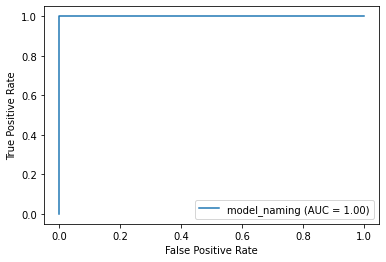

In [ ]:
#@markdown ###Assess Model Predict Performance

# factor_number = 5 #@param {type:"integer"}

y = df[dropdown_y_var.value]
prediction = df[dropdown_y_predict.value]
# print(y)
# print(prediction)

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

accu_score = accuracy_score(prediction, y)
print("     ")
print("**********")
print("Accurary Score: ", accu_score)
# print(prediction)
auc_score = roc_auc_score(y, prediction)
fpr, tpr, thresholds = metrics.roc_curve(y, prediction, pos_label=1)
print("     ")
print("**********")
print("AUC: ", auc_score)
print("Thresholds: ")
print(thresholds)
print("FPR: ")
print(fpr)
print("TPR: ")
print(tpr)
print("     ")


roc_auc = metrics.auc(fpr, tpr)
display_auc = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="model_naming")
display_auc.plot()
print("     ")
print("**********")
plt.show()



# model_r2_score, adj_r_squared, model_rmse_score, model_mape_score, mape_series = model_score(y, prediction, factor_number)

# print("     ")
# print("**********")
# print("R2 Score: ", model_r2_score)
# print("Adj R2 Score: ", adj_r_squared)


# print("     ")
# print("**********")
# print("RMSE Score: ", model_rmse_score)

# print("     ")
# print("**********")
# print("MAPE Score: ", model_mape_score)

# print(mape_series.describe())

##############################################